IndexError: index 3 is out of bounds for axis 0 with size 2

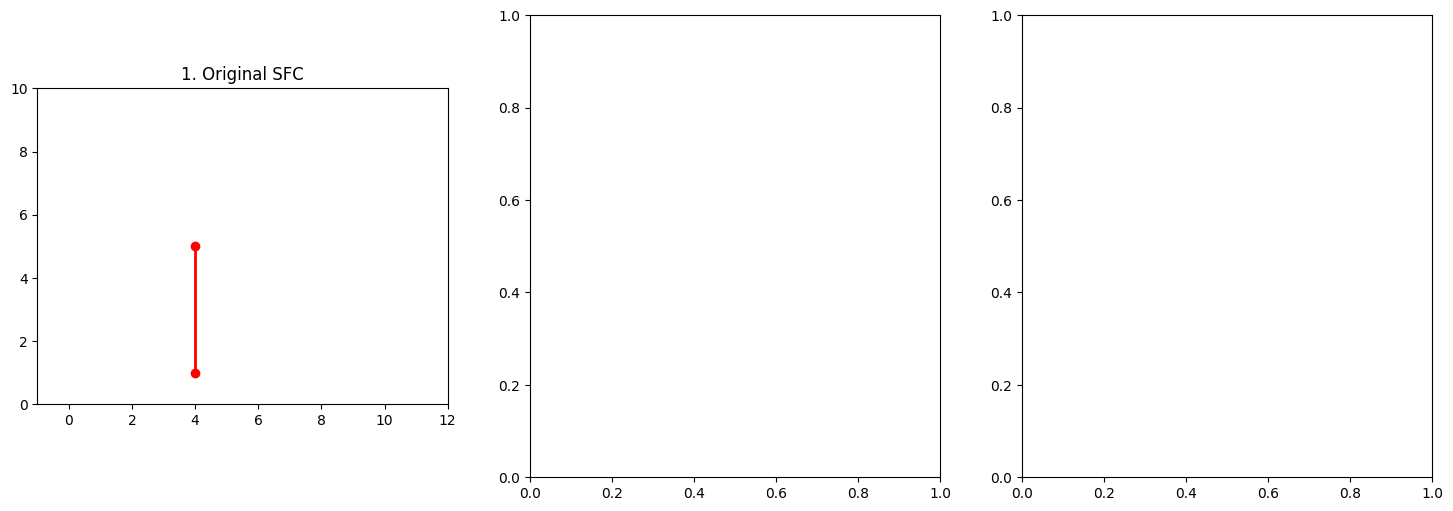

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplane(ax, normal, point, color, label, linestyle='-'):
    """绘制超平面（2D中的直线）"""
    x = np.linspace(-2, 12, 100)
    # normal*(x - point) + normal[3]*(y - point[3]) = 0
    if abs(normal[3]) > 1e-5:
        y = point[3] - (normal * (x - point)) / normal[3]
        ax.plot(x, y, color=color, label=label, linestyle=linestyle)
    else:
        ax.axvline(x=point, color=color, label=label, linestyle=linestyle)

def run_shrink_simulation():
    # 1. 定义路径段 L (p1 -> p2) [来源 17, 36]
    p1 = np.array([4.0, 1.0]) # 确保是两个元素，代表 (x1, y1)
    p2 = np.array([4.0, 5.0]) # 确保是两个元素，代表 (x2, y2)
    L = np.array([p1, p2])    # 现在 L 的形状是 (2, 2)，不会再报错
    
    # 机器人半径 rr [来源 32]
    rr = 1.0
    
    # 2. 模拟原始超平面 Hj (假设是走廊的一侧边缘)
    # 我们选择一个斜着的平面，展示收缩后可能剔除 p2 的情况 [来源 36, Fig 9(d)]
    normal = np.array([1.5, 1.0]) 
    normal = normal / np.linalg.norm(normal)
    point_on_plane = np.array([10.5, 6.0]) # 初始位置
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    titles = ["1. Original SFC", "2. Simple Shrink (Path Exclusion)", "3. Adjusted Shrink (Continuous)"]
    
    for i, ax in enumerate(axes):
        ax.set_xlim(-1, 12)
        ax.set_ylim(0, 10)
        ax.set_aspect('equal')
        ax.plot(L[:, 0], L[:, 1], 'ro-', linewidth=2, label='Path $L$')
        ax.set_title(titles[i])
        
        if i == 0:
            # 原始状态
            plot_hyperplane(ax, normal, point_on_plane, 'blue', 'Original Plane $H_j$')
            
        elif i == 1:
            # 简单收缩：沿法线向内推移 rr [来源 33]
            shrunk_point = point_on_plane - rr * normal
            plot_hyperplane(ax, normal, point_on_plane, 'blue', '', linestyle='--')
            plot_hyperplane(ax, normal, shrunk_point, 'orange', 'Simple Shrunk $H_j\'$')
            # 标记出 p2 被排除 [来源 36, Fig 9(d)]
            ax.scatter(p2, p2[3], s=200, facecolors='none', edgecolors='r', label='Exclusion Point')
            
        elif i == 2:
            # 修正收缩：如果 d(L, Hj) < rr，调整平面 [来源 34]
            # 计算 p2 到平面的距离，若小于 rr 则强制让平面与 p2 保持 rr 距离
            # 此处简化模拟：调整平面法向，使其刚好切于机器人圆周 [来源 36, Fig 9(e)]
            adjusted_normal = np.array([0, 1.0]) # 调整为水平，确保 p2 在下方 rr 处
            adjusted_point = p2 + np.array([0, rr])
            
            plot_hyperplane(ax, normal, point_on_plane, 'blue', '', linestyle='--')
            plot_hyperplane(ax, adjusted_normal, adjusted_point, 'green', 'Adjusted Plane $H_j\'\'$')
            # 绘制机器人安全半径示意
            circle = plt.Circle((p2, p2[3]), rr, color='green', fill=False, linestyle=':', label='Robot Radius $r_r$')
            ax.add_patch(circle)

        ax.legend(loc='lower left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_shrink_simulation()